In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


In [2]:
df= pd.read_csv("failure.csv")

In [3]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
df= df.drop(df[["date","device"]],axis=1)

In [5]:
df.isnull().sum()

failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [6]:
df["failure"].value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

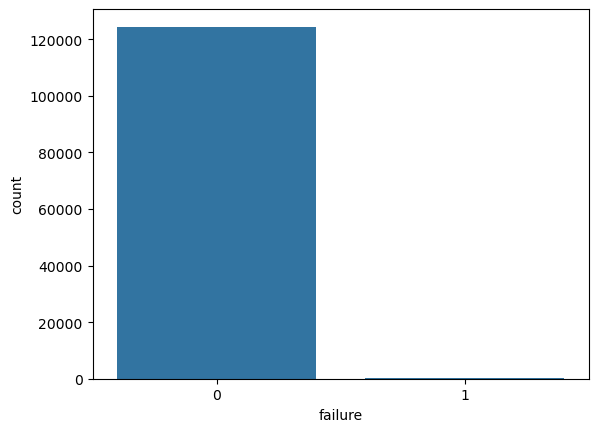

In [7]:
sns.countplot(x="failure", data=df)
plt.show()

In [8]:
# using smote

In [9]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
x= df.drop("failure", axis=1)
y= df["failure"]

In [11]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= .20, random_state=42)

In [30]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [36]:
l= LogisticRegression()
l.fit(x_train_smote, y_train_smote)

C:\Users\zeyil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred = l.predict(x_test)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     24881
           1       0.01      0.67      0.02        18

    accuracy                           0.95     24899
   macro avg       0.50      0.81      0.50     24899
weighted avg       1.00      0.95      0.97     24899

